In [62]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np

# Load the diabetes dataset
df = datasets.load_diabetes()
print(df)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [37]:
# Create a DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add target to the DataFrame
df['target'] = diabetes.target


In [38]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [40]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [41]:
X = df.drop('target', axis = 1)
y = df.target

In [76]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
# Scale data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
from sklearn.linear_model import Lasso

def lasso_regression(df, alpha):

    # Create an instance of the Lasso regression model
    model = Lasso(alpha=alpha)

    # Fit the model to the data
    model.fit(X_train, y_train)
    
    # Make predictions using the test data
    y_pred = model.predict(X_test)

    # Print the coefficients of the Lasso regression
    print('Coefficients:', model.coef_)

    # Model Score
    print("Model Score: ", lasso.score(X_test, y_test))
        
    # Print metrics
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

    return model

# Perform the Lasso regression analysis
lasso_regression(df, alpha = 1.0)

Coefficients: [  0.48287569 -10.23655929  26.90055639  17.34015649  -7.59247165
  -0.         -10.59008537   4.28698801  19.08227825   1.87752512]
Model Score:  0.4781535692283557
Mean Squared Error:  2784.334385980127
RMSE:  52.766792454915496


Lasso()

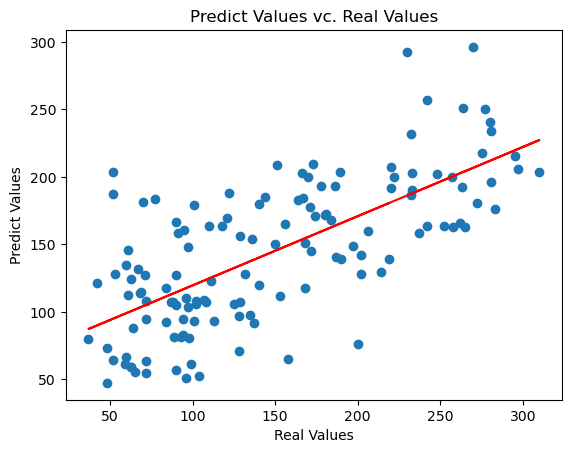

In [78]:
import matplotlib.pyplot as plt

# Crie o gráfico de dispersão
plt.scatter(y_test, y_pred)

# Predict Line
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red')

# Add title and labels
plt.title('Predict Values vc. Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predict Values')

# Show plot
plt.show()